In [2]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [3]:
df = pd.read_csv("../data/life_ladder_2005_2022_no1_gdp_sosupp.txt", delimiter=',')
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()

In [4]:
df.describe()

,year,life_ladder,log_gdp_per_capita,social_support
count,2166.000000,2166.000000,2166.000000,2166.000000
mean,2014.156048,5.481281,9.385013,0.811091
std,4.708856,1.121787,1.151911,0.120215
min,2005.000000,2.179000,5.527000,0.290000
25%,2010.000000,4.642500,8.496000,0.747000
50%,2014.000000,5.433000,9.498000,0.836000
75%,2018.000000,6.309750,10.366500,0.905000
max,2022.000000,8.019000,11.664000,0.987000


In [5]:
df.year.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2021, 2007, 2020, 2022, 2006, 2005])

In [6]:
year_lst = list(np.sort(df.year.unique()))
year_lst

[2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [7]:
df.query('year == 2022').sort_values(by= 'life_ladder', ascending= False ).head(10)

,country_name,year,life_ladder,log_gdp_per_capita,social_support
630,Finland,2022,7.729,10.814,0.974
918,Israel,2022,7.662,10.692,0.954
515,Denmark,2022,7.545,10.994,0.970
823,Iceland,2022,7.449,10.935,0.985
1842,Sweden,2022,7.431,10.913,0.949
1384,Netherlands,2022,7.390,10.981,0.929
1473,Norway,2022,7.295,11.111,0.927
1157,Luxembourg,2022,7.228,11.660,0.878
455,Costa Rica,2022,7.077,9.998,0.902
1145,Lithuania,2022,7.038,10.602,0.937


In [8]:
top_10_over_years = pd.DataFrame(columns = df.columns)
for item in year_lst:
    my_query = 'year == ' + str(item)
    top_10_over_years = pd.concat([top_10_over_years,
                                  df.query(my_query).sort_values(by= 'life_ladder', ascending= False ).head(5)],
                                  axis = 0)


#top_10_over_years   

In [9]:
top_10_over_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 499 to 1842
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country_name        90 non-null     object 
 1   year                90 non-null     object 
 2   life_ladder         90 non-null     float64
 3   log_gdp_per_capita  90 non-null     float64
 4   social_support      90 non-null     float64
dtypes: float64(3), object(2)
memory usage: 4.2+ KB


In [10]:
top_10_over_years.country_name.value_counts()

country_name
Denmark          17
Finland          12
Switzerland       9
Norway            9
Iceland           9
Netherlands       8
Canada            5
Sweden            5
Israel            5
Australia         2
New Zealand       2
Costa Rica        2
Austria           2
United States     1
Ireland           1
Venezuela         1
Name: count, dtype: int64

[Text(0, 0.5, 'Number of mentions in the top 5'), Text(0.5, 0, 'Country')]

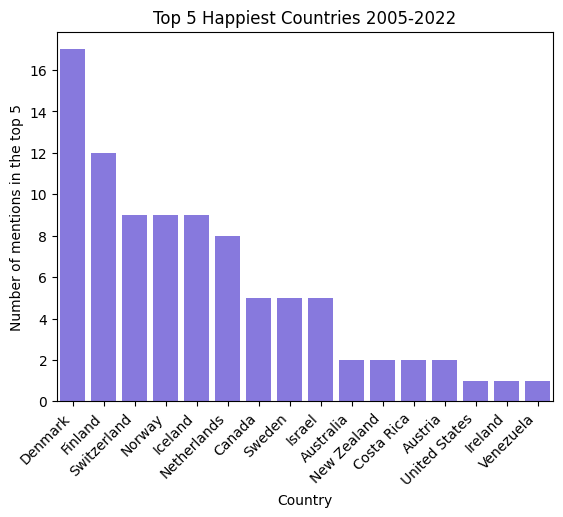

In [11]:
g=sns.countplot(data = top_10_over_years,
              x = 'country_name',
              order = top_10_over_years.country_name.value_counts().index,
              color = 'mediumslateblue')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set(title = 'Top 5 Happiest Countries 2005-2022')
g.set(ylabel= 'Number of mentions in the top 5', xlabel= 'Country')

In [12]:
#max_happy_per_year = pd.DataFrame(df.life_ladder.groupby(df.year).max())

In [13]:
max_happy_per_year = pd.DataFrame(columns = df.columns)
for item in year_lst:
    my_query = 'year == ' + str(item)
    max_happy_per_year = pd.concat([max_happy_per_year,
                                  df.query(my_query).sort_values(by= 'life_ladder', ascending= False ).head(1)],
                                  axis = 0)
max_happy_per_year

,country_name,year,life_ladder,log_gdp_per_capita,social_support
499,Denmark,2005,8.019,10.849,0.972
616,Finland,2006,7.672,10.745,0.965
500,Denmark,2007,7.834,10.889,0.954
501,Denmark,2008,7.971,10.878,0.954
502,Denmark,2009,7.683,10.822,0.939
503,Denmark,2010,7.771,10.836,0.975
504,Denmark,2011,7.788,10.845,0.962
1845,Switzerland,2012,7.776,11.107,0.947
330,Canada,2013,7.594,10.752,0.936
507,Denmark,2014,7.508,10.860,0.956


[Text(0, 0.5, 'Number of winner years'), Text(0.5, 0, 'Country')]

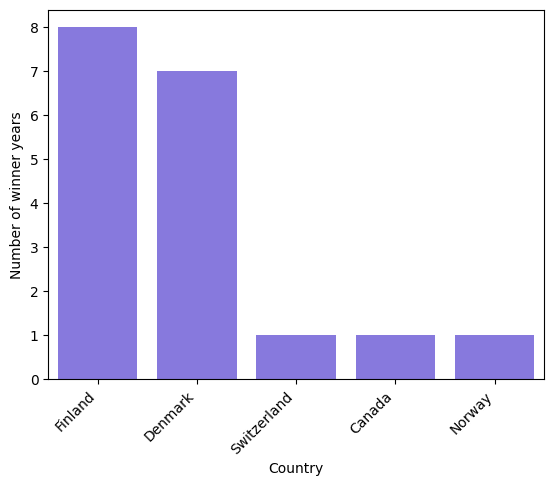

In [14]:
g=sns.countplot(data = max_happy_per_year,
              x = 'country_name',
              order = max_happy_per_year.country_name.value_counts().index,
              color = 'mediumslateblue')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set(title = '')
g.set(ylabel= 'Number of winner years', xlabel= 'Country')

In [15]:
#max_happy_per_year.rename(columns= {0:'year', 1: 'max_life_ladder'})

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Number of Countries')]

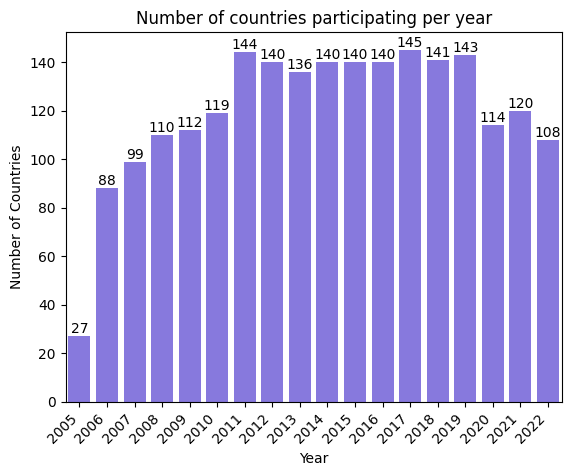

In [28]:
g = sns.countplot(x = df.year, color = 'mediumslateblue')
for c in g.containers:
        g.bar_label(c, label_type='edge')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set(title= 'Number of countries participating per year')
g.set(xlabel= 'Year', ylabel= 'Number of Countries')

add a column with the class of life_ladder, bin from 1 to 8

In [17]:
df.columns

Index(['country_name', 'year', 'life_ladder', 'log_gdp_per_capita',
       'social_support'],
      dtype='object')

In [18]:
df.ladder_bin = df.life_ladder.astype(int)

/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_26577/670890048.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.ladder_bin = df.life_ladder.astype(int)


In [19]:
df.head()

,country_name,year,life_ladder,log_gdp_per_capita,social_support
0,Afghanistan,2008,3.724,7.350,0.451
1,Afghanistan,2009,4.402,7.509,0.552
2,Afghanistan,2010,4.758,7.614,0.539
3,Afghanistan,2011,3.832,7.581,0.521
4,Afghanistan,2012,3.783,7.661,0.521


In [20]:
df.ladder_bin.value_counts()

life_ladder
5    663
4    577
6    477
7    248
3    181
2     19
8      1
Name: count, dtype: int64

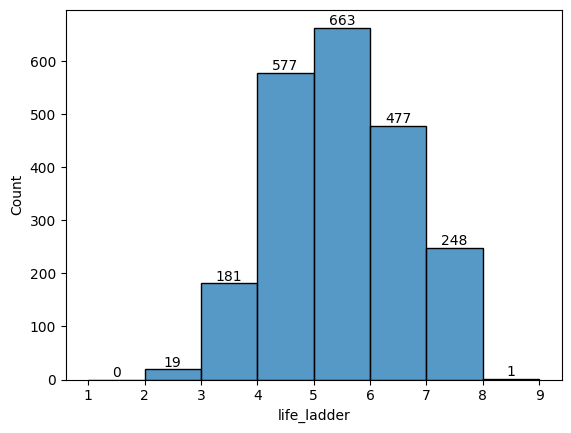

In [21]:
custom_bins = np.arange(1,10,1)
h = sns.histplot(df.life_ladder, bins = custom_bins)
for c in h.containers:
        h.bar_label(c, label_type='edge')

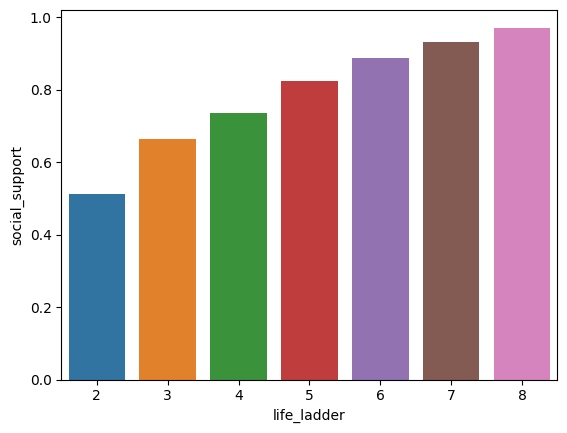

In [22]:
sns.barplot(x = df.ladder_bin, 
            y = df.social_support,
            errorbar= None);

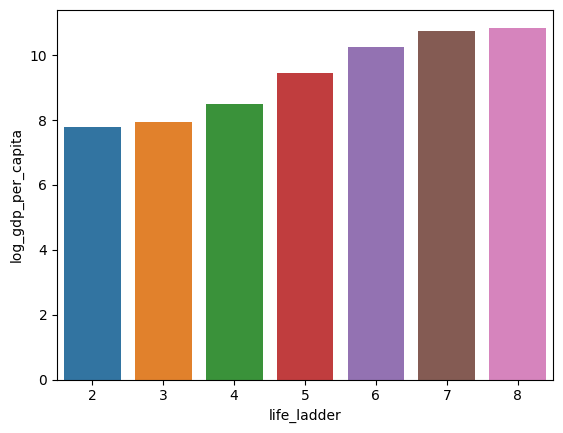

In [23]:
sns.barplot(x = df.ladder_bin, y = df.log_gdp_per_capita, errorbar= None);

In [24]:
df.columns

Index(['country_name', 'year', 'life_ladder', 'log_gdp_per_capita',
       'social_support'],
      dtype='object')

Europe

In [25]:
array(['Russia', 'Norway', 'France', 'Sweden', 'Belarus', 'Ukraine',
       'Poland', 'Austria', 'Hungary', 'Moldova', 'Romania', 'Lithuania',
       'Latvia', 'Estonia', 'Germany', 'Bulgaria', 'Greece', 'Albania',
       'Croatia', 'Switzerland', 'Luxembourg', 'Belgium', 'Netherlands',
       'Portugal', 'Spain', 'Ireland', 'Italy', 'Denmark',
       'United Kingdom', 'Iceland', 'Slovenia', 'Finland', 'Slovakia',
       'Czechia', 'Bosnia and Herzegovina', 'North Macedonia', 'Serbia',
       'Montenegro', 'Kosovo'], dtype=object)

NameError: name 'array' is not defined

In [ ]:
for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)

In [26]:
df.country_name.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 'Jordan'